In [93]:
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
import os
import pandas as pd
from scipy.stats import linregress
import nibabel as nib
import urllib
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook')
from __future__ import division

In [153]:
behav_data_f = '../../Phenotypic_V1_0b_preprocessed1.csv'
df = pd.read_csv(behav_data_f)

In [154]:
df = df.loc[df['func_perc_fd'].notnull(), :]
df = df.loc[df['FILE_ID']!='no_filename', :]
df['AGE_YRS'] = np.floor(df['AGE_AT_SCAN'])

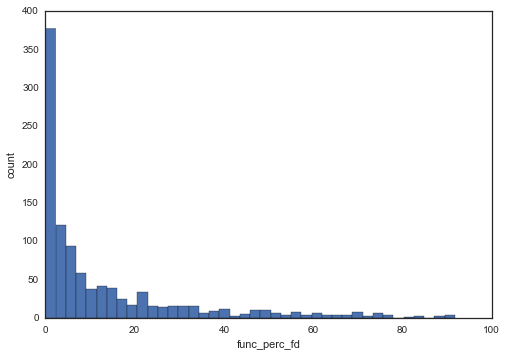

In [102]:
#df_samp_motion = df.loc[df['DX_GROUP']==2, :]
#df_samp_motion.head(30)
plt.hist(np.array(df["func_perc_fd"]),bins=40)
plt.xlabel('func_perc_fd')
plt.ylabel('count')

## Attempt at changing split_two_matched_samples to grab data from equal bins in dist of motion

In [103]:
motion_thresh = 50
df_samp_motion = df.loc[df['func_perc_fd']<motion_thresh, :]

## sort subjects based on motion

In [104]:
sort_column_list = ['func_perc_fd']
df_motion_sorted = df_samp_motion.sort_values(by=sort_column_list)


In [30]:
df_motion_sorted.head(5)

,Unnamed: 0,Unnamed: 0.1,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,...,qc_anat_rater_2,qc_anat_notes_rater_2,qc_func_rater_2,qc_func_notes_rater_2,qc_anat_rater_3,qc_anat_notes_rater_3,qc_func_rater_3,qc_func_notes_rater_3,SUB_IN_SMP,AGE_YRS
982,982,983,51313,983,51313,UCLA_2,UCLA_2_0051313,2,0,13.36,...,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1,13
252,252,253,50329,253,50329,UM_1,UM_1_0050329,2,0,17.10,...,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1,17
715,715,716,51028,716,51028,NYU,NYU_0051028,1,1,29.18,...,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1,29
547,547,548,50706,548,50706,LEUVEN_1,Leuven_1_0050706,2,0,22.00,...,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1,22
123,123,124,50184,124,50184,SDSU,SDSU_0050184,1,2,17.15,...,OK,NaN,OK,NaN,OK,NaN,OK,NaN,0,17


In [105]:
#check that sorted worked!
df = df_motion_sorted[['func_perc_fd', "SUB_ID"]]
df.head(10)

,func_perc_fd,SUB_ID
982,0,51313
252,0,50329
715,0,51028
547,0,50706
123,0,50184
1051,0,51465
1050,0,51464
126,0,50187
855,0,51177
549,0,50708


## rank subjects by motion

In [95]:
#df_samp_motion['func_perc_fd_rank'] = df_samp_motion['func_perc_fd'].rank(ascending=1)
#check that rank
#df = df_samp_motion[['func_perc_fd', "SUB_ID","func_perc_fd_rank"]]
#df.tail(10)
#plt.scatter(np.array(df["func_perc_fd_rank"]), np.array(df['func_perc_fd']))
#plt.xlabel('rank')
#plt.ylabel('func_perc_fd')

In [106]:
r=range(len(df_motion_sorted))
r_df=pd.DataFrame(r)
r_df.columns = ['rank']
r_df.head(3)

,rank
0,0
1,1
2,2


In [107]:
r_df['newcol'] = df_motion_sorted.index
r_df.head(3)

,rank,newcol
0,0,982
1,1,252
2,2,715


In [108]:
#r_df.set_index('newcol').loc[df_motion_sorted.index]
#r_df=r_df.set_index('newcol').loc[df_motion_sorted.index]
#r_df=r_df.set_index('newcol',drop=False).loc[df_motion_sorted.index]
r_df.set_index('newcol', inplace=True)
r_df.index.names = [None]

In [109]:
r_df.head(3)

,rank
982,0
252,1
715,2


In [110]:
df_motion_sorted_rank=pd.concat ([r_df,df_motion_sorted], axis=1)

In [111]:
df_motion_sorted_rank.head()

,rank,Unnamed: 0,Unnamed: 0.1,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,...,qc_anat_rater_2,qc_anat_notes_rater_2,qc_func_rater_2,qc_func_notes_rater_2,qc_anat_rater_3,qc_anat_notes_rater_3,qc_func_rater_3,qc_func_notes_rater_3,SUB_IN_SMP,AGE_YRS
982,0,982,983,51313,983,51313,UCLA_2,UCLA_2_0051313,2,0,...,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1,13
252,1,252,253,50329,253,50329,UM_1,UM_1_0050329,2,0,...,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1,17
715,2,715,716,51028,716,51028,NYU,NYU_0051028,1,1,...,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1,29
547,3,547,548,50706,548,50706,LEUVEN_1,Leuven_1_0050706,2,0,...,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1,22
123,4,123,124,50184,124,50184,SDSU,SDSU_0050184,1,2,...,OK,NaN,OK,NaN,OK,NaN,OK,NaN,0,17


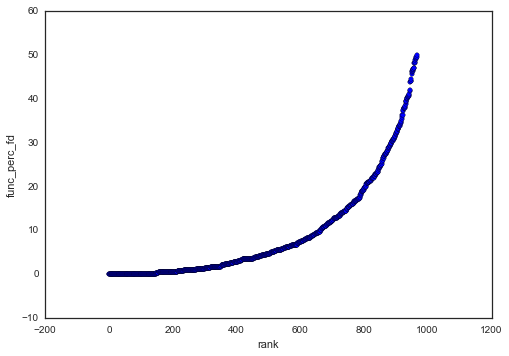

In [112]:
plt.scatter(np.array(df_motion_sorted_rank["rank"]), np.array(df_motion_sorted_rank['func_perc_fd']))
plt.xlabel('rank')
plt.ylabel('func_perc_fd')

## create bins of subjects in quartiles

In [113]:
# create percentile ranks
n=len(df_motion_sorted_rank)
chunk=n/4
chunk1=chunk
chunk2=2*chunk
chunk3=3*chunk
chunk4=n
chunk

241.75

In [114]:
first=df_motion_sorted_rank[df_motion_sorted_rank['rank']<=chunk1]

In [115]:
first.shape
first.tail(4) #top =201

,rank,Unnamed: 0,Unnamed: 0.1,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,...,qc_anat_rater_2,qc_anat_notes_rater_2,qc_func_rater_2,qc_func_notes_rater_2,qc_anat_rater_3,qc_anat_notes_rater_3,qc_func_rater_3,qc_func_notes_rater_3,SUB_IN_SMP,AGE_YRS
543,238,543,544,50702,544,50702,LEUVEN_1,Leuven_1_0050702,1,1,...,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1,18
991,239,991,992,51322,992,51322,MAX_MUN,MaxMun_b_0051322,1,2,...,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1,29
933,240,933,934,51256,934,51256,UCLA_1,UCLA_1_0051256,2,0,...,maybe,skull-striping fail;,OK,NaN,OK,NaN,OK,NaN,1,15
895,241,895,896,51218,896,51218,UCLA_1,UCLA_1_0051218,1,1,...,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1,16


In [116]:
second=df_motion_sorted_rank[(df_motion_sorted_rank['rank']>chunk1) & (df_motion_sorted_rank['rank']<=chunk2)]

In [117]:
second.shape
second.tail(4) #402

,rank,Unnamed: 0,Unnamed: 0.1,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,...,qc_anat_rater_2,qc_anat_notes_rater_2,qc_func_rater_2,qc_func_notes_rater_2,qc_anat_rater_3,qc_anat_notes_rater_3,qc_func_rater_3,qc_func_notes_rater_3,SUB_IN_SMP,AGE_YRS
69,480,69,70,50114,70,50114,OLIN,Olin_0050114,2,0,...,OK,NaN,OK,NaN,OK,NaN,OK,NaN,0,20
528,481,528,529,50687,529,50687,LEUVEN_1,Leuven_1_0050687,2,0,...,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1,22
563,482,563,564,50733,564,50733,LEUVEN_2,Leuven_2_0050733,2,0,...,OK,NaN,maybe,ic-cerebellum,OK,NaN,OK,NaN,1,14
568,483,568,569,50738,569,50738,LEUVEN_2,Leuven_2_0050738,2,0,...,OK,NaN,maybe,ic-cerebellum,OK,NaN,OK,NaN,1,12


In [118]:
third=df_motion_sorted_rank[(df_motion_sorted_rank['rank']>chunk2) & (df_motion_sorted_rank['rank']<=chunk3)]
third.shape
third.tail(4) #603

,rank,Unnamed: 0,Unnamed: 0.1,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,...,qc_anat_rater_2,qc_anat_notes_rater_2,qc_func_rater_2,qc_func_notes_rater_2,qc_anat_rater_3,qc_anat_notes_rater_3,qc_func_rater_3,qc_func_notes_rater_3,SUB_IN_SMP,AGE_YRS
108,722,108,109,50159,109,50159,OHSU,OHSU_0050159,2,-9999,...,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1,10
688,723,688,689,50998,689,50998,NYU,NYU_0050998,1,1,...,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1,13
70,724,70,71,50115,71,50115,OLIN,Olin_0050115,2,0,...,maybe,skull-striping fail,OK,NaN,OK,NaN,OK,NaN,1,23
597,725,597,598,50781,598,50781,KKI,KKI_0050781,2,0,...,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1,9


In [119]:
fourth=df_motion_sorted_rank[df_motion_sorted_rank['rank']>=chunk3]
fourth.shape
fourth.tail(4)

,rank,Unnamed: 0,Unnamed: 0.1,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,...,qc_anat_rater_2,qc_anat_notes_rater_2,qc_func_rater_2,qc_func_notes_rater_2,qc_anat_rater_3,qc_anat_notes_rater_3,qc_func_rater_3,qc_func_notes_rater_3,SUB_IN_SMP,AGE_YRS
24,963,24,25,50028,25,50028,PITT,Pitt_0050028,1,1,...,maybe,skull-striping fail,maybe,ic-parietal-cerebellum,OK,NaN,OK,NaN,1,12
513,964,513,514,50658,514,50658,CMU,CMU_b_0050658,2,0,...,fail,skull-striping fail,fail,ic-frontal-temporal-cerebellum-parietal,OK,NaN,OK,NaN,0,27
499,965,499,500,50644,500,50644,CMU,CMU_b_0050644,1,1,...,OK,NaN,maybe,ic-cerebellum,OK,NaN,OK,NaN,0,19
507,966,507,508,50652,508,50652,CMU,CMU_b_0050652,1,1,...,fail,skull-striping fail,fail,ic-frontal-temporal-cerebellum,OK,NaN,OK,NaN,0,24


(array([ 148.,    0.,    0.,    0.,   12.,    7.,   48.,    1.,   18.,    8.]),
 array([ 0.        ,  0.08264463,  0.16528926,  0.24793388,  0.33057851,
         0.41322314,  0.49586777,  0.5785124 ,  0.66115702,  0.74380165,
         0.82644628]),
 <a list of 10 Patch objects>)

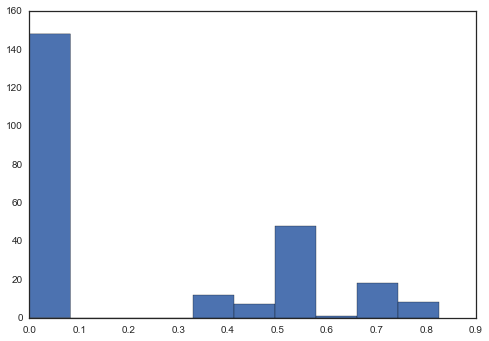

In [120]:
first["func_perc_fd"].mean()
plt.hist(np.array(first["func_perc_fd"]))

(array([ 50.,  33.,  26.,  26.,  14.,  17.,  27.,  22.,  19.,   8.]),
 array([ 0.82644628,  1.18204866,  1.53765105,  1.89325343,  2.24885582,
         2.6044582 ,  2.96006058,  3.31566297,  3.67126535,  4.02686774,
         4.38247012]),
 <a list of 10 Patch objects>)

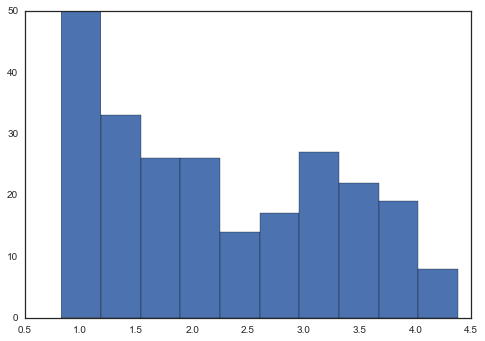

In [121]:
second["func_perc_fd"].mean()
plt.hist(np.array(second["func_perc_fd"]))

(array([ 40.,  39.,  31.,  27.,  22.,  20.,  10.,  16.,  16.,  21.]),
 array([  4.4198895 ,   5.31548017,   6.21107084,   7.10666151,
          8.00225217,   8.89784284,   9.79343351,  10.68902418,
         11.58461484,  12.48020551,  13.37579618]),
 <a list of 10 Patch objects>)

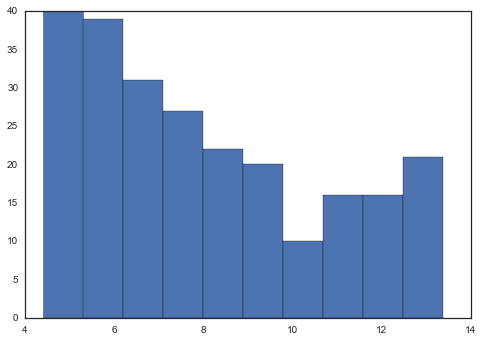

In [122]:
third["func_perc_fd"].mean()
plt.hist(np.array(third["func_perc_fd"]))

(array([ 60.,  29.,  36.,  23.,  25.,  20.,  12.,  14.,   6.,  16.]),
 array([ 13.69294606,  17.30807513,  20.9232042 ,  24.53833327,
         28.15346234,  31.76859141,  35.38372048,  38.99884955,
         42.61397862,  46.22910769,  49.84423676]),
 <a list of 10 Patch objects>)

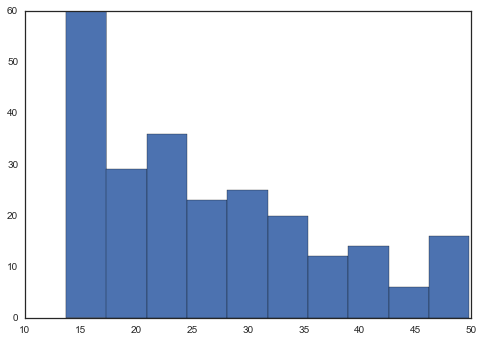

In [123]:
fourth["func_perc_fd"].mean()
plt.hist(np.array(fourth["func_perc_fd"]))

 ## take 2n/4 from each bin

In [43]:
#lets say our sample size is 100 (perhaps the max we should deal with right now)
# we want 100 per sample so 200 total
#thus we want to sample 50 per bin
#first we need to shuffle our subsamples, then grab the first 50 per list and add them together to create a new dataframe

In [140]:
n=100
n_samp=(n*2)/4
n_samp

50.0

## what do we do if sample is NOT equally divisible by 4?? just use even numbers for now and use n of at least 4 (We got this)

In [125]:
# shuffle within each bin
first_rand = first.reindex(np.random.permutation(first.index))
second_rand = second.reindex(np.random.permutation(second.index))
third_rand = third.reindex(np.random.permutation(third.index))
fourth_rand = fourth.reindex(np.random.permutation(fourth.index))


In [126]:
#grab n_samp from each
first_samp_2n = first_rand.iloc[:n_samp, :]
second_samp_2n = second_rand.iloc[:n_samp, :]
third_samp_2n = third_rand.iloc[:n_samp, :]
fourth_samp_2n = fourth_rand.iloc[:n_samp, :]

In [127]:
#append these together
frames = [first_samp_2n, second_samp_2n, third_samp_2n,fourth_samp_2n]

final_df = pd.concat(frames)

In [128]:
# Sort these participants according to the sort columns of interest
sort_column_list = ['DSM_IV_TR', 'DX_GROUP', 'SITE_ID', 'SEX', 'AGE_YRS']
df_samp_2n_sorted = final_df.sort_values(by=sort_column_list)

In [129]:
df_grp_A = df_samp_2n_sorted.iloc[::2, :]
df_grp_B = df_samp_2n_sorted.iloc[1::2, :]

In [130]:
print df_grp_A[['AGE_AT_SCAN', 'DX_GROUP', 'SEX']].describe()
print df_grp_B[['AGE_AT_SCAN', 'DX_GROUP', 'SEX']].describe()

       AGE_AT_SCAN    DX_GROUP         SEX
count   100.000000  100.000000  100.000000
mean     15.761112    1.510000    1.090000
std       6.130863    0.502418    0.287623
min       7.000000    1.000000    1.000000
25%      11.545000    1.000000    1.000000
50%      14.420000    2.000000    1.000000
75%      18.000000    2.000000    1.000000
max      38.760000    2.000000    2.000000
       AGE_AT_SCAN    DX_GROUP         SEX
count   100.000000  100.000000  100.000000
mean     16.071979    1.520000    1.160000
std       6.574765    0.502117    0.368453
min       7.933600    1.000000    1.000000
25%      11.987500    1.000000    1.000000
50%      13.855000    2.000000    1.000000
75%      18.458600    2.000000    1.000000
max      42.000000    2.000000    2.000000


### Write the function !

In [145]:
def split_two_matched_samples(df, motion_thresh, age_l, age_u, n):
    """
    This function takes in a data frame, thresholds it to only include
    participants whose percentage bad frames are less than motion_thresh
    and participants who are between the lower and upper age limits (inclusive),
    then returns two matched samples of size n. The samples are matched on
    age in years, autism diagnosis, gender and scanning site. This function also selectively samples the
    func_perc_fd
    Information about the motion measure is here:
    http://preprocessed-connectomes-project.org/quality-assessment-protocol/
    """
    
    # Start by removing all participants whose data is below a certain
    # motion threshold.
    df_samp_motion =  df.loc[df['func_perc_fd'] < motion_thresh, :]

    # Then remove participants who are younger (in years) than age_l and older
    # than age_u. Note that this means people who are age_l and age_u
    # (eg 6 and 10) will be included in the sample.
    df_samp = df_samp_motion.loc[(df_samp_motion['AGE_YRS']>=age_l)
                                    & (df_samp_motion['AGE_YRS']<=age_u), :]
                                    
    ##sort subjects based on motion
    sort_column_list = ['func_perc_fd']
    df_motion_sorted = df_samp.sort_values(by=sort_column_list)
    
    ##rank subjects by motion
    r=range(len(df_motion_sorted))
    r_df=pd.DataFrame(r)
    r_df.columns = ['rank']
    r_df['newcol'] = df_motion_sorted.index
    r_df.set_index('newcol', inplace=True)
    r_df.index.names = [None]
    df_motion_sorted_rank=pd.concat ([r_df,df_motion_sorted], axis=1)
    
    ##create bins of subjects in quartiles
    l=len(df_motion_sorted_rank)
    chunk=l/4
    chunk1=chunk
    chunk2=2*chunk
    chunk3=3*chunk
    chunk4=l
    
    first=df_motion_sorted_rank[df_motion_sorted_rank['rank']<=chunk1]
    second=df_motion_sorted_rank[(df_motion_sorted_rank['rank']>chunk1) & (df_motion_sorted_rank['rank']<=chunk2)]
    third=df_motion_sorted_rank[(df_motion_sorted_rank['rank']>chunk2) & (df_motion_sorted_rank['rank']<=chunk3)]
    fourth=df_motion_sorted_rank[df_motion_sorted_rank['rank']>=chunk3]
    
    ##take 2n/4 from each bin
    n_samp=(n*2)/4
    n_samp

    # Shuffle these remaining participants to ensure you get different sub
    # samples each time you run the code.
    first_rand = first.reindex(np.random.permutation(first.index))
    second_rand = second.reindex(np.random.permutation(second.index))
    third_rand = third.reindex(np.random.permutation(third.index))
    fourth_rand = fourth.reindex(np.random.permutation(fourth.index))

    # Only keep the top 2*n/4 participants.
    first_samp_2n = first_rand.iloc[:n_samp, :]
    second_samp_2n = second_rand.iloc[:n_samp, :]
    third_samp_2n = third_rand.iloc[:n_samp, :]
    fourth_samp_2n = fourth_rand.iloc[:n_samp, :]
    
    #append these together
    frames = [first_samp_2n, second_samp_2n, third_samp_2n,fourth_samp_2n]
    final_df = pd.concat(frames)

    # Sort these participants according to the sort columns of interest
    sort_column_list = ['DSM_IV_TR', 'DX_GROUP', 'SITE_ID', 'SEX', 'AGE_YRS']
    df_samp_2n_sorted = final_df.sort_values(by=sort_column_list)

    # Now put all even numbered participants in group A and all odd numbered
    # participants in group B.
    df_grp_A = df_samp_2n_sorted.iloc[::2, :]
    df_grp_B = df_samp_2n_sorted.iloc[1::2, :]

    # Boom! Return these two data frames
    return df_grp_A, df_grp_B


In [151]:
df_A, df_B = split_two_matched_samples(df, 50, 6, 18, 100)
print df_A[['AGE_AT_SCAN', 'DX_GROUP', 'SEX']].describe()
print df_B[['AGE_AT_SCAN', 'DX_GROUP', 'SEX']].describe()

       AGE_AT_SCAN  DX_GROUP         SEX
count   100.000000    100.00  100.000000
mean     13.141861      1.55    1.200000
std       2.653935      0.50    0.402015
min       6.470000      1.00    1.000000
25%      11.000000      1.00    1.000000
50%      13.435000      2.00    1.000000
75%      15.212500      2.00    1.000000
max      18.000000      2.00    2.000000
       AGE_AT_SCAN    DX_GROUP         SEX
count   100.000000  100.000000  100.000000
mean     13.398689    1.530000    1.120000
std       2.829474    0.501614    0.326599
min       7.150000    1.000000    1.000000
25%      11.417500    1.000000    1.000000
50%      13.265000    2.000000    1.000000
75%      15.675000    2.000000    1.000000
max      18.580000    2.000000    2.000000


## Trying to figure out max number of people we can sample per motion cutoff...

In [170]:
df_samp = df.loc[(df['AGE_YRS']<=18)]
len(df_samp)
#max sample of 743 people!

743

In [173]:
motion_thresh = 2
df_samp_motion = df_samp.loc[df['func_perc_fd']<motion_thresh, :]
#if motion thresh =5, we get minimal amount of 364 people! so maybe say our max sample is 100 for now?

In [174]:
len(df_samp_motion)


252